In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## importing dataset

In [3]:
df = pd.read_csv(r"S:\prac_ml_1\data\raw\winequality-red.csv")

## head of dataset

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## CHECKING FOR NULLS

In [5]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

## checking the values

In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
x = df.groupby('alc_vs_volatile')['quality'].mean()
plt.plot(x.index,x.values)
plt.xlabel('alc_vs_volatile')
plt.ylabel('quality')
plt.show()

KeyError: 'alc_vs_volatile'

In [8]:
# Compute correlation matrix
corr = df.corr()

# Correlation of all features with quality
print(corr['quality'].sort_values(ascending=False))

quality                 1.000000
alcohol                 0.476166
sulphates               0.251397
citric acid             0.226373
fixed acidity           0.124052
residual sugar          0.013732
free sulfur dioxide    -0.050656
pH                     -0.057731
chlorides              -0.128907
density                -0.174919
total sulfur dioxide   -0.185100
volatile acidity       -0.390558
Name: quality, dtype: float64


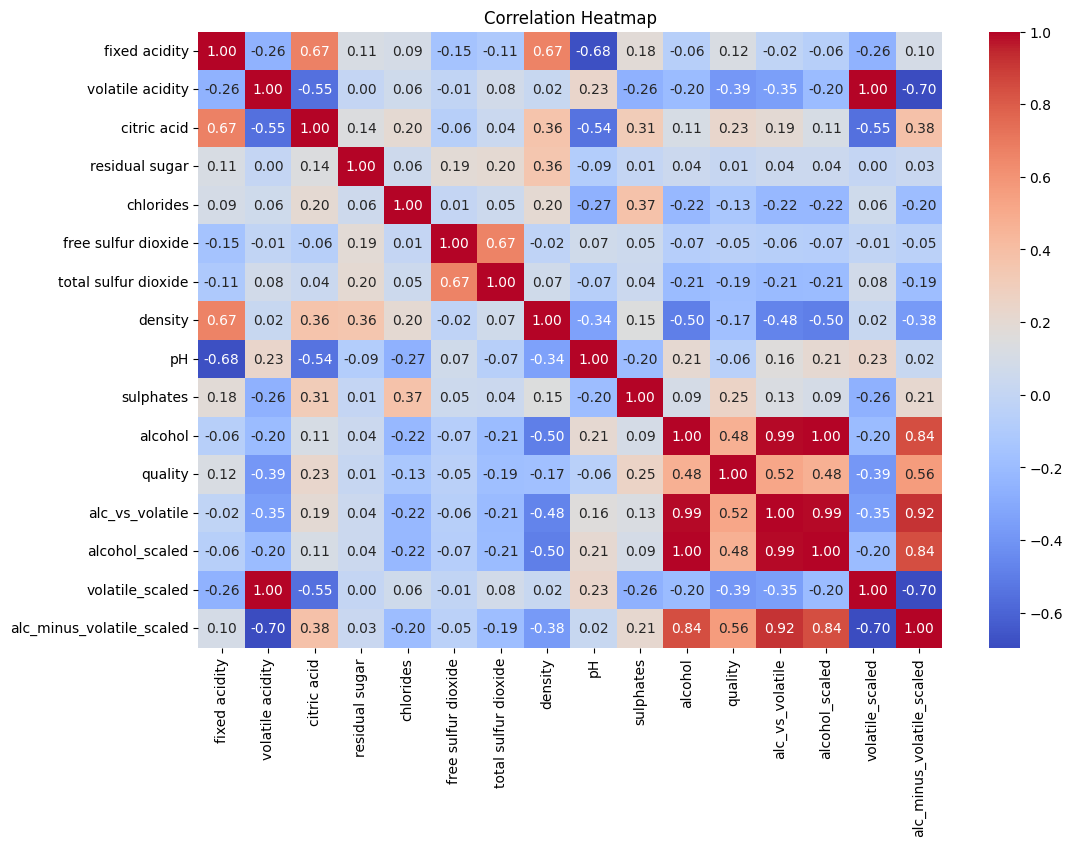

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [9]:
df['alc_vs_volatile'] = df['alcohol'] - df['volatile acidity']  # ratio
# OR
# df['alc_minus_volatile'] = df['alcohol'] - df['volatile acidity']  # difference

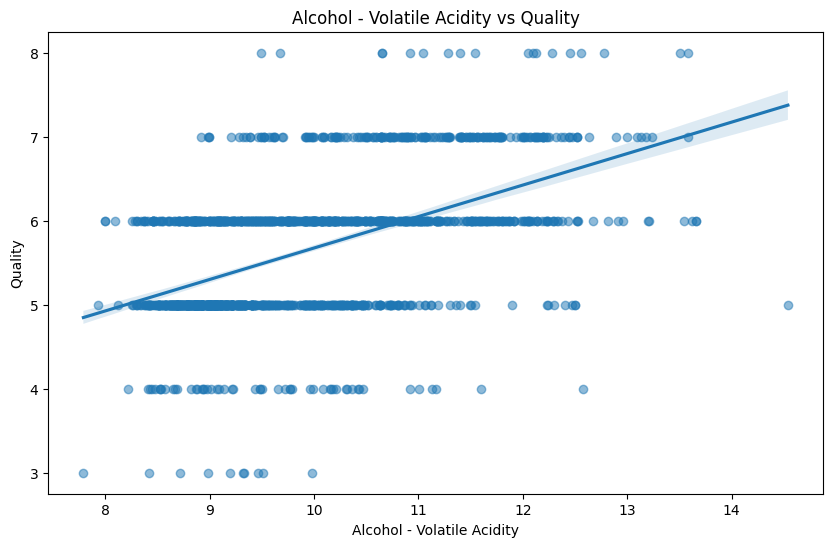

In [11]:

plt.figure(figsize=(10,6))
sns.regplot(x='alc_vs_volatile', y='quality', data=df, scatter_kws={'alpha':0.5})
plt.title("Alcohol - Volatile Acidity vs Quality")
plt.xlabel("Alcohol - Volatile Acidity")
plt.ylabel("Quality")
plt.show()


### SO ACCORDING TO MY OBSERVATION THIS DATASET IS BALANCED AND PRE-PROCESSED SO WE CAN DIRECTLY DIVE INTO THE EDA 
### AND WHILE I'VE BEING OBSERVING THE CORELATIONS HIGHEST +VE COOR IS WITH ALCOHOL AND -VE WITH VOLATILE ACIDITY
### I HAVE DERIVED A NEW FEATURE BU GETTING DIFFERENCE BET THOSE TWO IT HAS EVEN HIGHER IMPACT ON THE QUALITY THATS'IT

### NORMALIZING THE ALCOHOL AND VOLATILE ACIDITY DUW TO ITS MIN AND MAX VALUES HUGE DIFFERENCES

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df[['alcohol_scaled', 'volatile_scaled']] = scaler.fit_transform(df[['alcohol', 'volatile acidity']])


In [14]:
df['alc_minus_volatile_scaled'] = df['alcohol_scaled'] - df['volatile_scaled']


In [55]:
# bye session_1

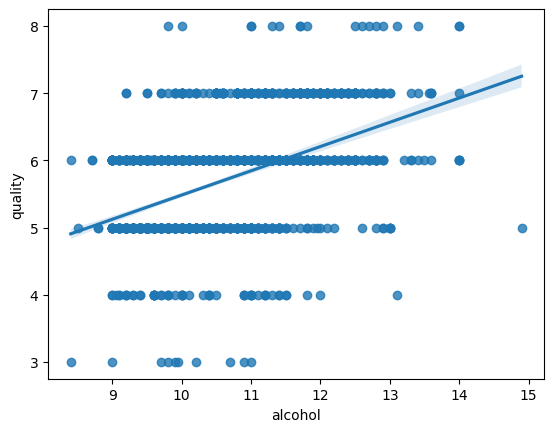

In [17]:
sns.regplot(x="alcohol", y="quality",data = df)
plt.show()
